In [2]:
# Imports and random seeds
import tensorflow as tf
import matplotlib.pyplot as plt 

%matplotlib inline

import numpy as np
np.random.seed(7)

In [3]:
print(tf.__version__)

2.0.0-rc0


Install TensorFlow 2.0 by running if you haven't already - 

 `pip install tensorflow==2.0.0-rc0`

In [3]:
# Load data and normalize
fashion_mnist = mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Helper function to generate 100 random indexes specific to labels
def generate_random_subset(label, ds_type):
    
    if ds_type == 'train':
        # Extract the label indexes
        index, = np.where(y_train==label) 
        index_list = np.array(index)
        # Randomly shuffle the indexes
        np.random.shuffle(index_list)
        # Return 100 indexes
        return index_list[:100]
    elif ds_type == 'test':
        # Extract the label indexes
        index, = np.where(y_test==label) 
        index_list = np.array(index)
        # Randomly shuffle the indexes
        np.random.shuffle(index_list)
        # Return 30 indexes
        return index_list[:30]

In [5]:
# Decode the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

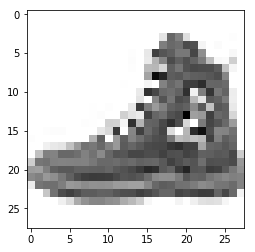


The apparel is:  Ankle boot


In [6]:
# Generate the training subset
indexes = []
for label in np.unique(y_train):
    index = generate_random_subset(label, 'train')
    indexes.append(index)

all_indexes = [ii for i in indexes for ii in i]

x_train_s, y_train_s = x_train[all_indexes[:1000]],\
            y_train[all_indexes[:1000]]

# Show a random image from the newly created training subset
rand_num = np.random.randint(1, 1000)
    
plt.imshow(x_train_s[rand_num],cmap=plt.cm.binary)
plt.show()
print('\nThe apparel is: ',str(class_names[y_train_s[rand_num]]))

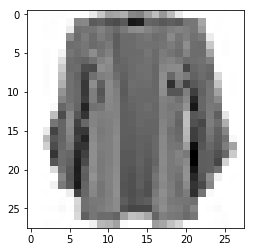


The apparel is:  Coat


In [7]:
# Generate the test subset
indexes = []
for label in np.unique(y_test):
    index = generate_random_subset(label, 'test')
    indexes.append(index)

all_indexes = [ii for i in indexes for ii in i]

x_test_s, y_test_s = x_test[all_indexes[:300]],\
            y_test[all_indexes[:300]]

# Show a random image from the newly created test subset
rand_num = np.random.randint(1, 300)
    
plt.imshow(x_test_s[rand_num],cmap=plt.cm.binary)
plt.show()
print('\nThe apparel is: ',str(class_names[y_test_s[rand_num]]))

In [8]:
# Baseline model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


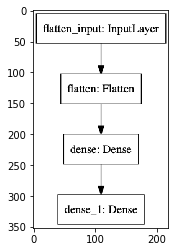

In [9]:
# Model plot
from tensorflow.keras.utils import plot_model

# Needs pydot and graphviz
plot_model(model, to_file='model.png')

img = plt.imread('model.png')
plt.imshow(img)
plt.show()

In [10]:
# Train the network and validate
model.fit(x_train_s, y_train_s,
           validation_data=(x_test_s, y_test_s),
           epochs=5,
           batch_size=32)

W0829 11:37:39.146714 4617274816 deprecation.py:323] From /miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1000 samples, validate on 300 samples
Epoch 1/5
1000/1000 [==============================] - 1s 508us/sample - loss: 1.3712 - accuracy: 0.5530 - val_loss: 0.9184 - val_accuracy: 0.6567
Epoch 2/5
1000/1000 [==============================] - 0s 97us/sample - loss: 0.8024 - accuracy: 0.7310 - val_loss: 0.7468 - val_accuracy: 0.7167
Epoch 3/5
1000/1000 [==============================] - 0s 103us/sample - loss: 0.6859 - accuracy: 0.7650 - val_loss: 0.7429 - val_accuracy: 0.7067
Epoch 4/5
1000/1000 [==============================] - 0s 91us/sample - loss: 0.6015 - accuracy: 0.8030 - val_loss: 0.7182 - val_accuracy: 0.7400
Epoch 5/5
1000/1000 [==============================] - 0s 94us/sample - loss: 0.5409 - accuracy: 0.8180 - val_loss: 0.6210 - val_accuracy: 0.7633


In [11]:
# Predict on a few test images
def show_single_preds(index):
    pred = model.predict_classes(np.expand_dims(x_test_s[index], axis=0))
    print('Model\'s prediction: ',str(class_names[np.asscalar(pred)]))
    print('\nReality:', str(class_names[y_test_s[index]]))
    plt.imshow(x_test_s[index], cmap=plt.cm.binary)
    plt.show()

Model's prediction:  T-shirt/top

Reality: T-shirt/top


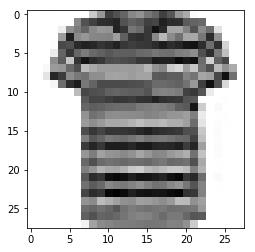

In [12]:
show_single_preds(12)

Model's prediction:  Dress

Reality: Dress


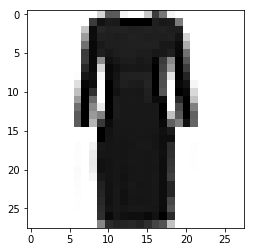

In [13]:
show_single_preds(101)

Model's prediction:  Dress

Reality: Trouser


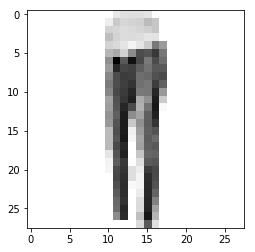

In [14]:
show_single_preds(45)

In [15]:
# Visulization of models activations 
layer_outputs = [layer.output for layer in model.layers[:3]] 
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs) 

In [16]:
# Get the raw image pixels: first test image in this case
img_tensor = np.expand_dims(x_test_s[0], axis=0)
# Get the activations
activations = activation_model.predict(img_tensor)

In [17]:
# What is there in the second layer?
second_layer_activation = activations[1]
print(second_layer_activation.shape)

(1, 128)


In [18]:
# Reshape
reshaped = second_layer_activation.reshape(1, 16, 8)

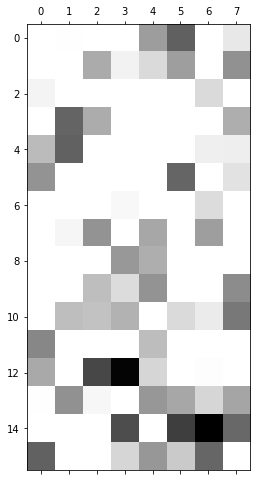

In [19]:
plt.matshow(reshaped[0, :, :], cmap=plt.cm.binary)

In [20]:
# What is there in the output layer?
output_layer_activation = activations[2]
print(output_layer_activation.shape)

(1, 10)


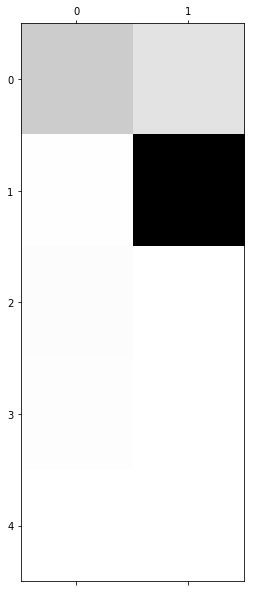

In [108]:
# Reshape
reshaped = output_layer_activation.reshape(1, 5, 2)
plt.matshow(reshaped[0, :, :], cmap=plt.cm.binary)

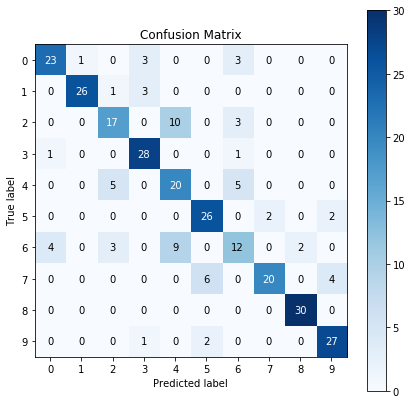

In [21]:
# Plotting model's confusion matrix
import scikitplot as skplt

preds = model.predict_classes(x_test_s)

skplt.metrics.plot_confusion_matrix(y_test_s, preds, figsize=(7,7))
plt.show()

In [24]:
# Saving the subsets for reproducibility
np.save('x_train_s.npy', x_train_s)
np.save('y_train_s.npy', y_train_s)
np.save('x_test_s.npy', x_test_s)
np.save('y_test_s.npy', y_test_s)

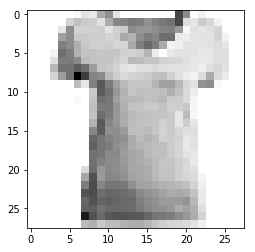

In [25]:
# Load and verify
a = np.load('tmp/x_train_s.npy')
plt.imshow(a[0], cmap=plt.cm.binary)
plt.show()